In this code, we reproduce the paper's results:
Entropy 2021, 23(2), 179; https://doi.org/10.3390/e23020179


In [ ]:
#Libraries
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# Define constants
# Source location
x_a = 10
# Initial time for source
t_i = 0
# Detector location
x_c = 7
# Time of detection
t_f = 60
# Standard deviation of the Gaussian wavefunctions
sigma = 1

# Define time and space range for visualization
x_range = np.linspace(-20, 30, 400)
t_range = np.linspace(0, 60, 400)

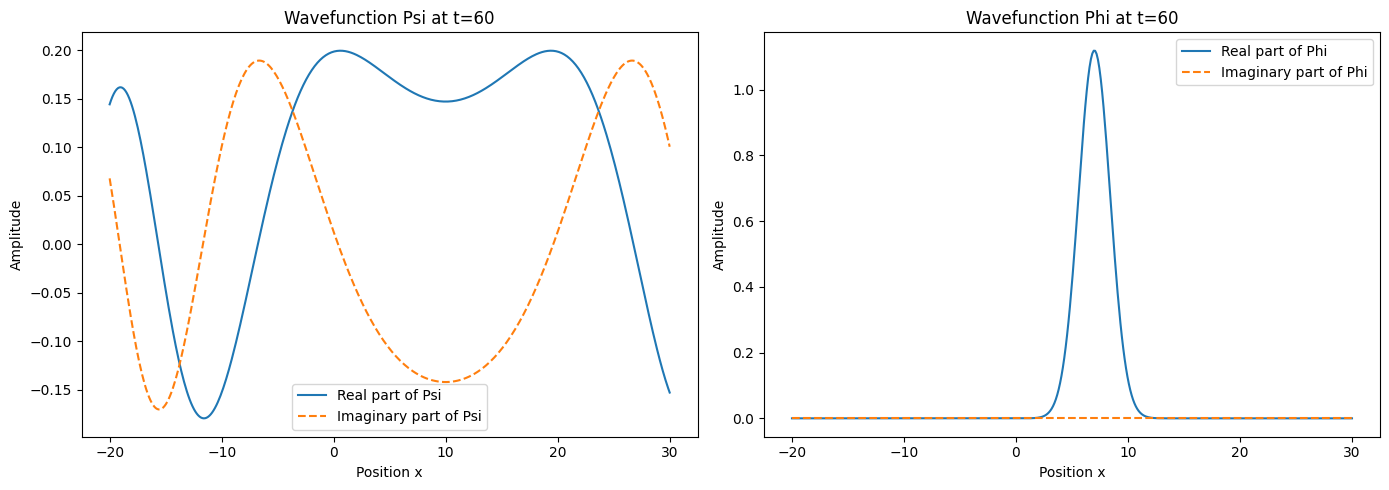

In [ ]:
# Gaussian wavefunction definition
def gaussian_wavefunction(x, t, x0, t0):
    return (2*np.pi)**0.25 * (1j*(t-t0) + 2)**(-0.5) * np.exp(-((x-x0)**2) / (2 * 1j * (t-t0) + 4))

# Calculate the wavefunctions at the emission (psi) and detection (phi)
psi_t60 = gaussian_wavefunction(x_range, 60, x_a, t_i)  # Psi at t=60
phi_t60 = gaussian_wavefunction(x_range, 60, x_c, t_f)  # Phi at t=60

# Plot the real parts of psi and phi at t=60
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(x_range, psi_t60.real, label='Real part of Psi')
plt.plot(x_range, psi_t60.imag, label='Imaginary part of Psi', linestyle='--')
plt.title('Wavefunction Psi at t=60')
plt.xlabel('Position x')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x_range, phi_t60.real, label='Real part of Phi')
plt.plot(x_range, phi_t60.imag, label='Imaginary part of Phi', linestyle='--')
plt.title('Wavefunction Phi at t=60')
plt.xlabel('Position x')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

Now, the overlap

In [ ]:
#Gaussian wavefunctions as a function of space and time
def psi(x, t, x0, t0):
    return (2 * np.pi)**0.25 * (1j * (t - t0) + sigma**2)**(-0.5) * np.exp(-(x - x0)**2 / (2 * 1j * (t - t0) + 2 * sigma**2))

def phi(x, t, x0, t0):
    return (2 * np.pi)**0.25 * (1j * (t - t0) + sigma**2)**(-0.5) * np.exp(-(x - x0)**2 / (2 * 1j * (t - t0) + 2 * sigma**2))


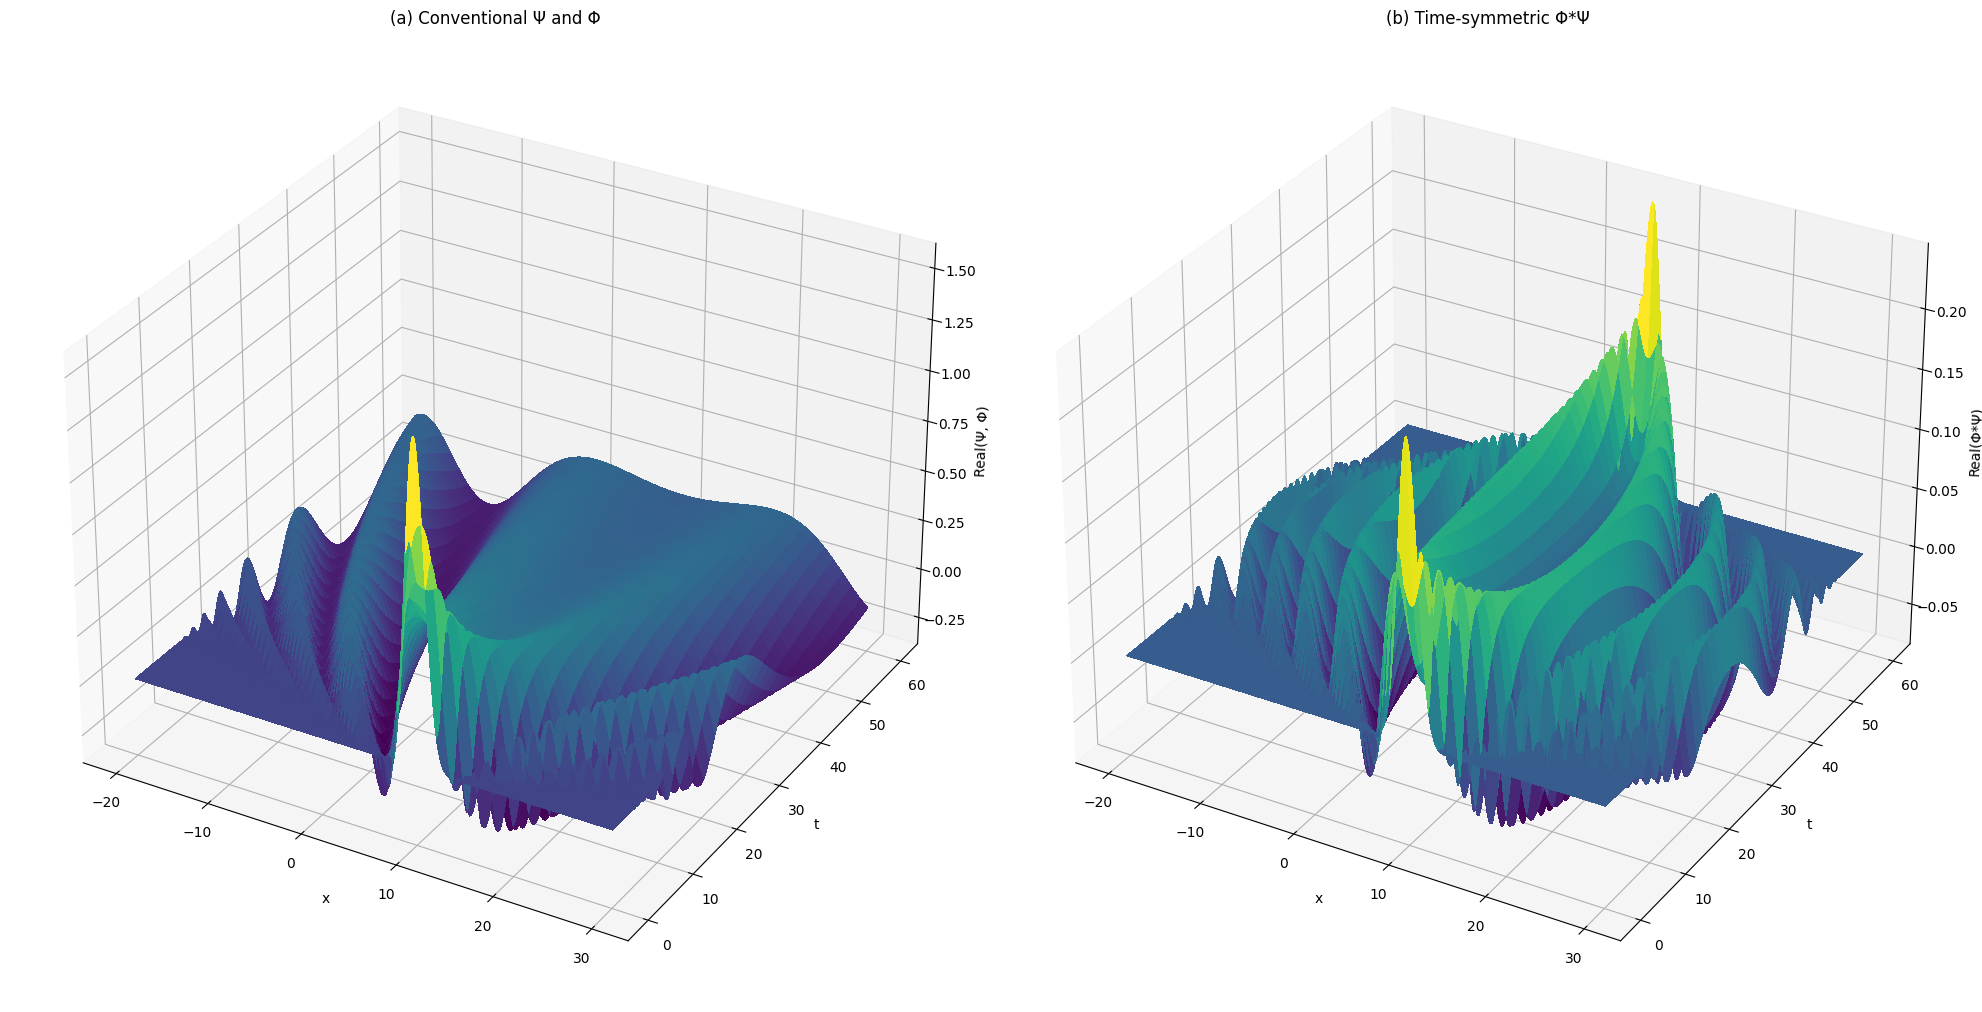

In [ ]:
#meshgrid for space and time
X, T = np.meshgrid(x_range, t_range)

#  The wavefunctions at each point in the grid
Psi = psi(X, T, x_a, t_i)
Phi = phi(X, T, x_c, t_f)

# 3D plots
fig = plt.figure(figsize=(20, 10))

# Plot the conventional wavefunctions Ψ and Φ
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, T, Psi.real, cmap=cm.viridis, linewidth=0, antialiased=False)
ax1.set_title('(a) Conventional Ψ and Φ')
ax1.set_xlabel('x')
ax1.set_ylabel('t')
ax1.set_zlabel('Real(Ψ, Φ)')

# Plot the time-symmetric product Φ*Ψ
Phi_star_Psi = np.conj(Phi) * Psi
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, T, Phi_star_Psi.real, cmap=cm.viridis, linewidth=0, antialiased=False)
ax2.set_title('(b) Time-symmetric Φ*Ψ')
ax2.set_xlabel('x')
ax2.set_ylabel('t')
ax2.set_zlabel('Real(Φ*Ψ)')

plt.tight_layout()
plt.show()
